<a href="https://colab.research.google.com/github/novay/amikom/blob/main/ai_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **RTM-3 - MEMBANGUN MODEL**<br/>
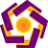

### **Universitas Amikom Yogyakarta**<br/> **Program Studi PJJ S2 Teknik Informatika**<br/>

Tugas Ke : **3 (Tiga)**<br/>
Mata Kuliah : **Artificial Intelligence (AI)**<br/>
Dosen Pengampu : **Dr. Moh. Fal Sadikin, S.T., M.Eng.**<br/>
Tutor : **Windha Mega Pradnya D., M.Kom.**

### **A. Overview**<br/>
Laporan ini menjawab tugas yang diberikan pada perkuliahan yang dilakukan pada pertemuan ke-6 (Enam) bersama Ibu **Windha Mega Pradnya D., M.Kom.** yang dilaksanakan pada tanggal 31 Maret 2023.

#### **1. Informasi Mahasiswa**<br/>
- Nama : **Novianto Rahmadi (22.55.2293)**
- Konsentrasi : **Business Intelligence (BI)**

#### **2. Uraian Tugas**<br/>
- Gunakan dataset **Iris** (https://archive.ics.uci.edu/ml/datasets/iris)
- Data dibagi dengan proporsi :
  - Data Latih **(70%)**
  - Data Uji **(30%)**
- Terapkan **Semua Algoritma** yang ada dalam *hands-on* dan lakukan analisa perbandingan terhadap performa yang dihasilkan.

#### **3. Pustaka yang Digunakan**<br/>


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

""" Digunakan untuk mempercantik tabel pada dataframe """
from google.colab import data_table
data_table.enable_dataframe_formatter()

### **B. Classification Method**<br/>
Berikut ini saya uraikan hasil dari percobaan menggunakan resources yang disediakan, lengkap dengan langkah (step-by-step) yang disederhanakan penjelasannya.

#### **1. Pemilihan Dataset**<br/>
Tahap awal yang harus kita lakukan dalam membuat model adalah menentukan dataset yang ingin kita olah. Dan untuk menjawab pertanyaan ini, saya akan menggunakan dataset yang disarankan yaitu **Dataset Bunga Iris** yang telah tersedia dalam pustaka **Sklearn**.

**Referensi:**<br/>
https://archive.ics.uci.edu/ml/datasets/iris

In [37]:
from sklearn import datasets

iris = datasets.load_iris()
print("Banyak Data =", len(iris.data))
print("=================")

kelas = pd.DataFrame(iris.target_names)
kelas = kelas.rename(columns={0: 'Kelas'}); kelas.index = kelas.index + 1
display(kelas)

atribut = pd.DataFrame(iris.feature_names)
atribut = atribut.rename(columns={0: 'Atribut'}); atribut.index = atribut.index + 1
display(atribut)

Banyak Data = 150


,Kelas
1,setosa
2,versicolor
3,virginica


,Atribut
1,sepal length (cm)
2,sepal width (cm)
3,petal length (cm)
4,petal width (cm)


Dari output diatas, diketahui banyak data Iris yang digunakan adalah sejumlah **150 sampel**, yang terdiri dari **3 kelas**, yaitu: 
1. Iris Setosa 
2. Iris Versicolour, dan
3. Iris Virginica 

Adapun **atribut/fitur** dari dataset ini terdiri dari:
1. **panjang sepal** (bagian kelopak bunga) dalam sentimeter, 
2. **lebar sepal** (bagian kelopak bunga) dalam sentimeter, 
3. **panjang petal** (kelopak bunga) dalam sentimeter, dan 
4. **lebar petal** (kelopak bunga) dalam sentimeter.

#### **2. Define Prediktor & Target**<br/>
Setelah memahami dataset yang akan diolah, selanjutnya kita perlu menentukan **variabel prediktor (X)** dan **variabel target (y)**-nya.

In [48]:
X = iris.data
y = iris.target

define = pd.DataFrame(X, columns=iris.feature_names)
define['target'] = y
define['target'] = define['target'].map({0: "setosa", 1: "versicolor", 2: "virginica"})

define.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Dari output diatas, disimpulkan bahwa masing-masing variabel X dan Y yang dibuat akan bertindak sebagai **variabel prediktor (X)** dan **variabel target (y)**, dimana:

- Variabel Predictor akan berisi informasi **sepal length (cm)**, **sepal width (cm)**, **petal length (cm)** dan **petal width (cm)**.
- Variabel Target akan berisi prediksi kelas yaitu **setosa**, **versicolour** dan **virginica**.

#### **3. Split Dataset**<br/>
Langkah selanjutnya setelah menentukan variabel-variabelnya adalah membagi dataset menjadi 2 bagian, yaitu **data training** dan **data uji**.<br/>Dari penjelasan berikut, terdapat 2 cara atau metode yang bisa dilakukan untuk melakukan pembagian dataset ini, yaitu: 

##### **3.1 Train-Validation Split**<br/>
Teknik ini menjadi yang paling sering digunakan, adapun teknik ini membagi data menjadi dua subset: training set dan validation set, dimana: 
- Training set digunakan untuk melatih model dan 
- Validation set digunakan untuk mengevaluasi performa model.

Kelebihan dari teknik ini adalah lebih cepat dan lebih sederhana dibandingkan teknik *K-Fold Cross Validation*. Namun, kelemahannya adalah model bisa *overfitting* atau *underfitting* pada data validasi karena ukuran data validasi yang terbatas.

Berikut ini contoh menggunakan teknik ini dalam Python, yaitu dengan menggunakan fungsi `train_test_split()` dari **Scikit-Learn**.

In [51]:
from sklearn.model_selection import train_test_split

'''
  Penjelasan parameter dalam Train-Validation Split
  - X = berisi fitur-fitur dari dataset (variabel prediktor)
  - y = berisi target atau label dari dataset (variabel target)
  - train_size = menunjukkan proporsi data yang akan digunakan sebagai data latih (dalam hal ini 70%)
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

print("Data Latih :", len(X_train))
print("Data Uji   :", len(X_test))

Data Latih : 105
Data Uji   : 45


##### **3.2 K-Fold Cross Validation**<br/>

Berbeda dengan Train-Validation Split, K-Fold Cross Validation membagi data menjadi **k subset** yang sama besar. Setiap subset akan dipakai sebagai validation set secara bergantian dan sisanya sebagai training set.

Kelebihan dari teknik ini adalah model dapat dievaluasi pada seluruh data dan tidak ada data yang dibuang. Kelemahan dari teknik ini adalah memakan waktu lebih lama dan kompleksitas yang lebih tinggi dibandingkan Train-Validation Split.

Dalam Train-Validation Split, kita dapat memilih ukuran validation set secara fleksibel, sementara dalam K-Fold Cross Validation ini, ukuran validation set ditentukan oleh jumlah subset yang dibuat.

---

Berikut ini contoh untuk melakukan split menggunakan K-Fold Cross Validation:

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1)
scores = cross_val_score(model, X, y, cv = 5)

print("Akurasi model SVM untuk tiap fold: ", scores)
print("Akurasi model SVM dengan 5-Fold Cross Validation: ", scores.mean())

Akurasi model SVM untuk tiap fold:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Akurasi model SVM dengan 5-Fold Cross Validation:  0.9800000000000001


#### **4. Pembuatan Model Klasifikasi**<br/>
Sebelum memutuskan untuk membuat **model**, perlu diputuskan terlebih dahulu terkait **data split** mana yang akan digunakan.<br/>Syntax lanjutan dalam laporan ini akan menggunakan data hasil split dari metode **Train-Validation Split**.

##### **4.1 Logistic Regression**<br/>
Logistic Regression adalah salah satu jenis algoritma Machine Learning pada supervised learning yang digunakan untuk memprediksi nilai diskrit, yaitu binary (0/1), True/False, dan lain-lain. Tujuannya adalah untuk menentukan kemungkinan suatu event yang terjadi, dengan menghitung nilai probability dalam bentuk nilai antara 0 dan 1. 


**Referensi:**<br/>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

###### **a) Model**

In [101]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

###### **b) Confusion Matrix**

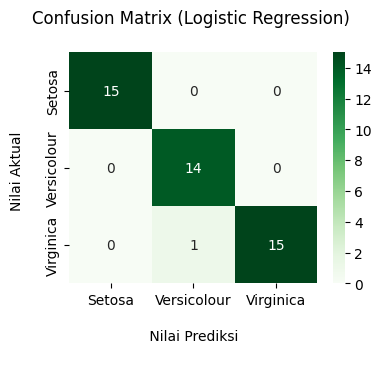

In [103]:
y_predRegresi = lr.predict(X_test)

cm = confusion_matrix(y_test, y_predRegresi)

plt.figure(figsize=(4,3))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Greens")
fx.set_title('Confusion Matrix (Logistic Regression) \n');
fx.set_xlabel('\n Nilai Prediksi \n')
fx.set_ylabel('Nilai Aktual \n');
fx.xaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
fx.yaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
plt.show()

###### **c) Accuracy Score**

In [104]:
score = accuracy_score(y_test, y_predRegresi)
print("Akurasi Logistic Regression =", score)

Akurasi Logistic Regression = 0.9777777777777777


##### **4.2 Support Vector Machine**<br/>
Support Vector Machine (SVM) adalah salah satu algoritma pembelajaran mesin yang digunakan untuk klasifikasi dan regresi. SVM mencari sebuah hyperplane dalam sebuah ruang dengan dimensi tinggi yang memisahkan dua kelas, sehingga margin antara kedua kelas adalah maksimum. 

**Referensi:**<br/>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

###### **a) Model**

In [127]:
from sklearn.svm import SVC

'''
  Penjelasan parameter:
  - SCV     = fungsi untuk membuat model SVM
  - kernel  = jenis kernel yang digunakan, diantaranya
              - rbf       = Radial Basis Function, kernel yang paling fleksibel dan dapat digunakan untuk menangani data yang sangat kompleks
              - poly      = digunakan ketika data memiliki pola yang kompleks dan sulit dipisahkan dengan garis lurus
              - linear    = digunakan ketika data terbentuk oleh garis lurus di antara mereka
              - signoid   = digunakan ketika data memiliki pola yang kompleks dan sulit dipisahkan dengan garis lurus
  - C       = untuk mengatur trade-off antara penyebaran kesalahan (misclassification) dan kompleksitas model. Semakin besar nilai C, semakin kompleks model, dan semakin sedikit kesalahan yang diperbolehkan
  - gamma   = untuk mengatur lebar fungsi kernel. Semakin kecil nilai gamma, semakin lebar fungsi kernel, dan semakin banyak titik yang mempengaruhi hasil prediksi
  - degree  = khusus kernel 'poly', untuk menentukan derajat polinomial pada kernel
'''
svm = SVC(kernel = 'rbf', C = 1, gamma = 0.01)
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

###### **b) Confusion Matrix**

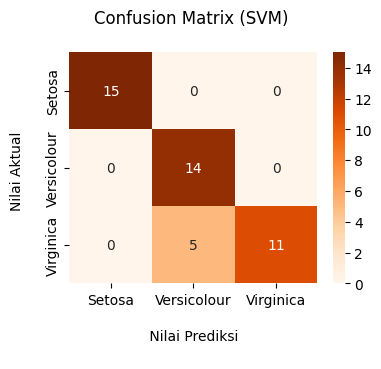

In [113]:
y_predSVM = svm.predict(X_test)

cm = confusion_matrix(y_test, y_predSVM)

plt.figure(figsize=(4,3))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Oranges")
fx.set_title('Confusion Matrix (SVM) \n');
fx.set_xlabel('\n Nilai Prediksi \n')
fx.set_ylabel('Nilai Aktual \n');
fx.xaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
fx.yaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
plt.show()

###### **c) Accuracy Score**

In [114]:
score = accuracy_score(y_test, y_predSVM)
print("Akurasi SVM =", score)

Akurasi SVM = 0.8888888888888888


##### **4.3 Decision Tree**<br/>
Decision Tree adalah sebuah model pembelajaran mesin yang digunakan untuk melakukan klasifikasi dan prediksi dengan membuat struktur pohon keputusan yang terdiri dari node (simpul), cabang (branch), dan daun (leaf). 

**Referensi:**<br/>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

###### **a) Model**

In [120]:
from sklearn.tree import DecisionTreeClassifier

'''
  Penjelasan parameter:
  - DecisionTreeClassifier = fungsi untuk membuat model Decision Tree
  - max_depth = untuk menentukan kedalaman maksimum pohon keputusan. Nilai None berarti tidak ada batasan kedalaman.
  - min_samples_split = untuk menentukan jumlah minimum sampel yang dibutuhkan untuk membagi sebuah node. 
    dalam contoh ini, setiap node harus memiliki setidaknya 2 sampel untuk dapat dibagi menjadi dua cabang baru.
'''
dt = DecisionTreeClassifier(max_depth = None, min_samples_split = 2)
# dt = DecisionTreeClassifier(max_depth = 1, min_samples_split = 2)

dt.fit(X_train, y_train)

DecisionTreeClassifier()

###### **b) Confusion Matrix**

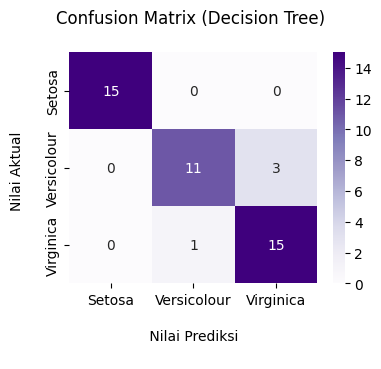

In [117]:
y_predDT = dt.predict(X_test)

cm = confusion_matrix(y_test, y_predDT)

plt.figure(figsize=(4,3))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Purples")
fx.set_title('Confusion Matrix (Decision Tree) \n');
fx.set_xlabel('\n Nilai Prediksi \n')
fx.set_ylabel('Nilai Aktual \n');
fx.xaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
fx.yaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
plt.show()

###### **c) Accuracy Score**

In [119]:
score = accuracy_score(y_test, y_predDT)
print("Akurasi Decision Tree =", score)

Akurasi Decision Tree = 0.9111111111111111


##### **4.4 Naive Bayes**<br/>
Naive Bayes adalah salah satu algoritma klasifikasi yang berdasarkan pada teorema Bayes. Algoritma ini menggunakan model probabilistik sederhana untuk memprediksi kelas dari suatu data berdasarkan fitur-fiturnya.

**Referensi:**<br/>
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

###### **a) Model**

In [125]:
from sklearn import naive_bayes

nb = naive_bayes.BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

###### **b) Confusion Matrix**

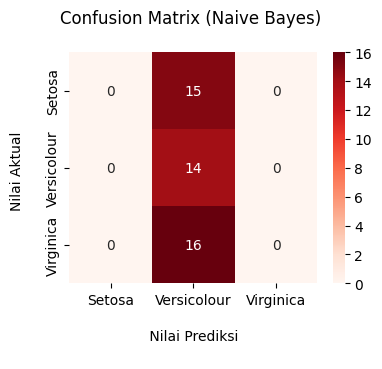

In [98]:
y_predNB = nb.predict(X_test)

cm = confusion_matrix(y_test, y_predNB)

plt.figure(figsize=(4,3))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Reds")
fx.set_title('Confusion Matrix (Naive Bayes) \n');
fx.set_xlabel('\n Nilai Prediksi \n')
fx.set_ylabel('Nilai Aktual \n');
fx.xaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
fx.yaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
plt.show()

###### **c) Accuracy Score**

In [90]:
score = accuracy_score(y_test, y_predNB)
print("Akurasi Naive Bayes =", score)

Akurasi Naive Bayes = 0.3111111111111111


##### **4.5 K-Nearest Neighbors**<br/>
K-Nearest Neighbors (K-NN) adalah algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi. Algoritma ini mencari k titik data terdekat dari titik data baru yang akan diklasifikasikan atau diregresi. Kemudian, nilai kelas atau nilai rata-rata dari tetangga terdekat digunakan untuk memprediksi nilai kelas atau nilai target dari titik data baru tersebut.

**Referensi:**<br/>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

###### **a) Model**

In [126]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

###### **b) Confusion Matrix**

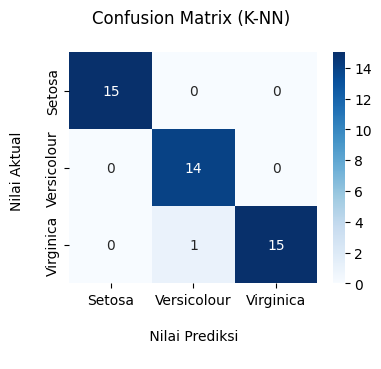

In [124]:
y_predKNN = knn.predict(X_test)

cm = confusion_matrix(y_test, y_predKNN)

plt.figure(figsize=(4,3))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")
fx.set_title('Confusion Matrix (K-NN) \n');
fx.set_xlabel('\n Nilai Prediksi \n')
fx.set_ylabel('Nilai Aktual \n');
fx.xaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
fx.yaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
plt.show()

###### **c) Accuracy Score**

In [87]:
score = metrics.accuracy_score(y_test, y_predKNN)
print("Akurasi KNN =", score)

Akurasi KNN = 0.9777777777777777


#### **5. Evaluasi atau Pengujian**<br/>
Dari hasil pembuatan model menggunakan beberapa metode diatas, berikut ini saya kombinasikan semua hasil pengujian ke dalam satu dataframe sebagai berikut:

In [85]:
from sklearn.metrics import accuracy_score

index= ['Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes', 'KNN']
cols = ['Akurasi']

df = pd.DataFrame(np.array([
    round(accuracy_score(y_test, y_predRegresi)*100,2), 
    round(accuracy_score(y_test, y_predSVM)*100,2), 
    round(accuracy_score(y_test, y_predDT)*100,2), 
    round(accuracy_score(y_test, y_predNB)*100,2), 
    round(accuracy_score(y_test, y_predKNN)*100,2)]), index=index, columns=cols)

df

,Akurasi
Logistic Regression,97.78
SVM,88.89
Decision Tree,91.11
Naive Bayes,31.11
KNN,97.78


Seperti yang dilihat dari perbandingan hasil akurasi yang ditemukan, beberapa metode (hampir semua) menunjukkan tren akurasi yang positif (mendekati 100%). Dengan kata lain, bisa dikatakan bahwa hasil dari pengujian metode klasifikasi ini adalah cukup akurat.

### **C. Penutup**<br/>
Demikian laporan hasil pengujian **hand-on** yang diberikan.

<br/>

Salam Hormat,<br/>
**Novianto Rahmadi (22.55.2293)**